Classification techniques are an essential part of machine learning and data mining applications.
There are lots of classification problems that are available, but the logistics regression is common and is a useful regression method for solving the binary classification problem.

Another category of classification is Multinomial classification, which handles the issues where multiple classes are present in the target variable. For example, IRIS dataset a very famous example of multi-class classification.

Logistic Regression is one of the most simple and commonly used Machine Learning algorithms for two-class classification. It is easy to implement and can be used as the baseline for any binary classification problem

In this tutorial, you will learn the following things in Logistic Regression:

Introduction to Logistic Regression
1. Linear Regression Vs. Logistic Regression
2. Maximum Likelihood Estimation Vs. Ordinary Least Square Method
3. How do Logistic Regression works?
4. Model building in Scikit-learn
5. Model Evaluation using Confusion Matrix.
6. Advantages and Disadvantages of Logistic Regression


It is a special case of linear regression where the target variable is categorical in nature. It uses a log of odds as the dependent variable. Logistic Regression predicts the probability of occurrence of a binary event utilizing a logit function.

Linear Regression Equation:


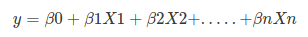


Sigmoid Function:


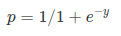


Apply Sigmoid function on linear regression:

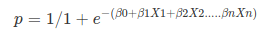

Properties of Logistic Regression:

1. The dependent variable in logistic regression follows Bernoulli Distribution.
2. Estimation is done through maximum likelihood.
3. No R Square, Model fitness is calculated through Concordance, KS-Statistics.

### Linear Regression Vs. Logistic Regression

Linear regression gives you a continuous output, but logistic regression provides a constant output. 

An example of the continuous output is house price and stock price. 
Example's of the discrete output is predicting whether a patient has cancer or not, 

Linear regression is estimated using Ordinary Least Squares (OLS) while logistic regression is estimated using Maximum Likelihood Estimation (MLE) approach.


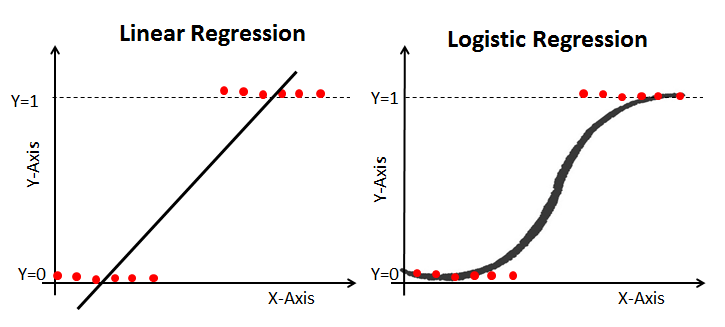

## Maximum Likelihood Estimation Vs. Least Square Method

The MLE is a "likelihood" maximization method, while OLS is a distance-minimizing approximation method. 

Maximizing the likelihood function determines the parameters that are most likely to produce the observed data. From a statistical point of view, MLE sets the mean and variance as parameters in determining the specific parametric values for a given model. This set of parameters can be used for predicting the data needed in a normal distribution.

Ordinary Least squares estimates are computed by fitting a regression line on given data points that has the minimum sum of the squared deviations (least square error). in linear regression

## Sigmoid Function
The sigmoid function, also called logistic function gives an ‘S’ shaped curve that can take any real-valued number and map it into a value between 0 and 1. If the curve goes to positive infinity, y predicted will become 1, and if the curve goes to negative infinity, y predicted will become 0. If the output of the sigmoid function is more than 0.5, we can classify the outcome as 1 or YES, and if it is less than 0.5, we can classify it as 0 or NO. The outputcannotFor example: If the output is 0.75, we can say in terms of probability as: There is a 75 percent chance that patient will suffer from cancer.



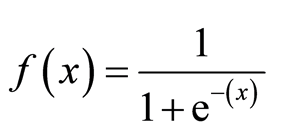

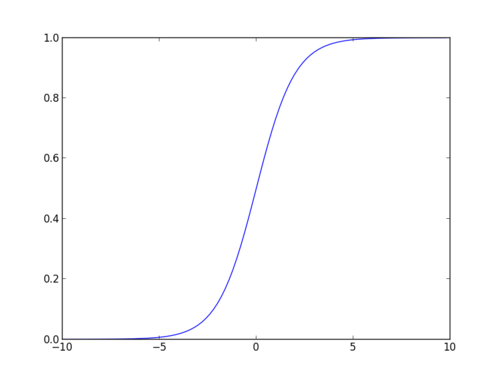

Types of Logistic Regression
Types of Logistic Regression:

1. Binary Logistic Regression: The target variable has only two possible outcomes such as Spam or Not Spam, Cancer or No Cancer.
2. Multinomial Logistic Regression: The target variable has three or more nominal categories such as predicting the type of Wine.
3. Ordinal Logistic Regression: the target variable has three or more ordinal categories such as restaurant or product rating from 1 to 5.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

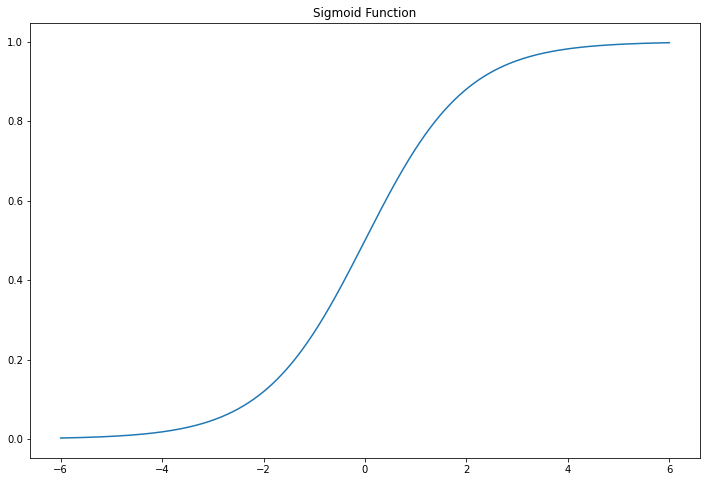

In [1]:
x = np.linspace(-6, 6, num = 1000)
plt.figure(figsize = (12,8))
plt.plot(x, 1 / (1 + np.exp(-x))); # Sigmoid Function
plt.title("Sigmoid Function");

In [2]:
import pandas as pd

In [3]:
pima = pd.read_csv("diabetes.csv")

In [4]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#split dataset in features and target variable
feature_cols = ['Pregnancies', 'Insulin','BloodPressure', 'BMI', 'Age','Glucose','DiabetesPedigreeFunction']
X = pima[feature_cols] # Features
y = pima.Outcome # Target variable

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=1)

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [8]:
model_score=logreg.score(X_test,y_test)

In [9]:
# import the metrics class
from sklearn.metrics import confusion_matrix 
cnf_matrix = confusion_matrix(y_test, y_pred)
cnf_matrix

array([[130,   0],
       [ 62,   0]], dtype=int64)

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 257.44, 'Predicted label')

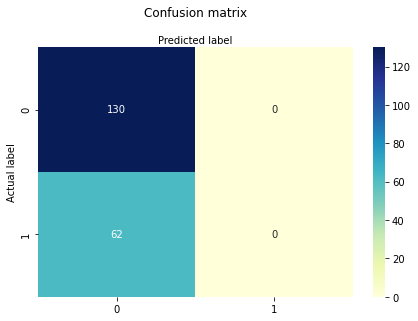

In [11]:
import  matplotlib.pyplot as plt
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [12]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.6770833333333334
Precision: 0.0
Recall: 0.0


C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [13]:
# accuracy measures by classification_report()
result = metrics.classification_report(y_test,y_pred)

# print the result
print(result)

              precision    recall  f1-score   support

           0       0.68      1.00      0.81       130
           1       0.00      0.00      0.00        62

    accuracy                           0.68       192
   macro avg       0.34      0.50      0.40       192
weighted avg       0.46      0.68      0.55       192



C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Supriya\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


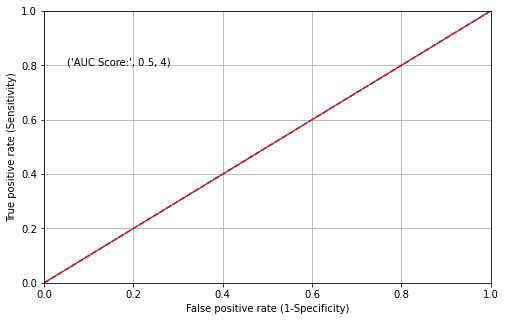

In [14]:
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', metrics.roc_auc_score(y_test, y_pred),4))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

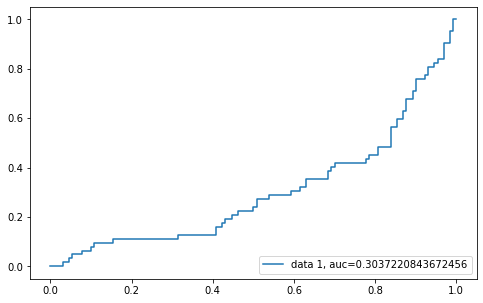

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

## Advantages

Because of its efficient and straightforward nature, doesn't require high computation power, easy to implement, easily interpretable, used widely by data analyst and scientist. Also, it doesn't require scaling of features. Logistic regression provides a probability score for observations.

## Disadvantages

Logistic regression is not able to handle a large number of categorical features/variables. It is vulnerable to overfitting. Also, can't solve the non-linear problem with the logistic regression that is why it requires a transformation of non-linear features. Logistic regression will not perform well with independent variables that are not correlated to the target variable and are very similar or correlated to each other.